In [1]:
filename_data = "../scClass_data/pbmc68k.h5ad"

In [2]:
import sys; sys.path.append("/home/shhsu/download/scClass_v2")
import scClass
from scClass.train import Model

In [3]:
import scanpy as sc
import pandas as pd
import numpy as np

In [4]:
adata = sc.read_h5ad(filename_data)

In [5]:
adata = scClass.pp.transmodel(adata,gene='Gene',gene_ref='Gene')

/home/shhsu/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


get gene seq...
0% 10% 21% 32% 43% 54% 65% 76% 87% 98% 
Of 45468 genes in the input file, 20303 were found in the training set of 20729 genes.
mapping to model...
0% 81% 

In [6]:
adata = scClass.pp.preprocess(adata,filter=True,random=False,normalize=True)

filter type_id=-1 cell:  91789  -> 91789  cells
normalizing data


In [7]:
model = scClass.load()

loading model from:  /home/shhsu/download/scClass_v2/scClass/data/model_default.pkl


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]


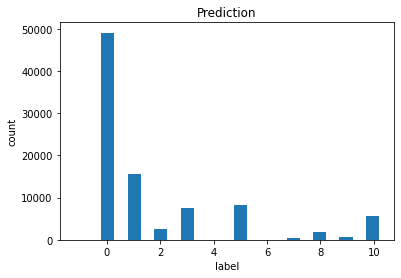

In [8]:
y_pred = scClass.predict(adata,model)

total acc: 85.9765331357788 %


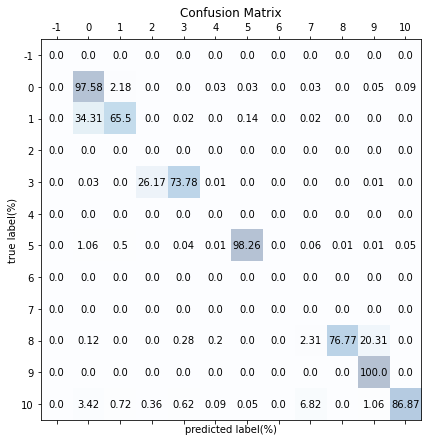

In [9]:
y_true = adata.obs['transfer_id'].values 
scClass.confusion_matrix(y_pred=y_pred,y_true=y_true)

In [13]:
Y_pred = np.array(y_pred[y_true>=-1])
Y_true = y_true[y_true>=-1]
accuary = (Y_pred==Y_true).sum()/Y_pred.shape[0]
from sklearn.metrics import *
precision = precision_score(Y_pred,Y_true,average=None)
precision = precision[precision>0].mean()
recall = recall_score(Y_pred,Y_true,average=None)
recall = recall[recall>0].mean()
f1 = f1_score(Y_pred,Y_true,average=None)
f1 = f1[f1>0].mean()
import pandas as pd
table = [
  ['accuary',accuary],
  ['precision',precision],
  ['recall',recall],
  ['f1-score',f1]
]
pd.DataFrame(table)

0         1
0    accuary  0.859765
1  precision  0.855378
2     recall  0.842213
3   f1-score  0.793205